In [6]:
import pandas as pd
import numpy as np 
from metrics import *
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline



In [2]:
y_train = [0,1,1,1,0,0,0,1]
y_predict = [0,1,0,1,0,1,0,0]
print(accuracy(y_train,y_predict))

0.625


In [3]:
print(accuracy_v2(y_train,y_predict))

0.625


In [4]:
print(precision(y_train,y_predict))

0.6666666666666666


In [5]:
print(recall(y_train,y_predict))

0.5


In [6]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, 0.17554844, 0.15952202, 0.03819563, 0.11639273, 0.079377, 0.08584789, 0.39095342, 0.27259048, 0.03447096, 0.04644807, 0.03543574, 0.18521942, 0.05934905, 0.61977213, 0.33056815]

In [7]:
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377, 0.08584789, 0.11114267, 0.11639273, 0.15952202, 0.17554844, 0.18521942, 0.27259048, 0.31620708, 0.33056815, 0.39095342, 0.61977213]
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

Text(0, 0.5, 'Precision')

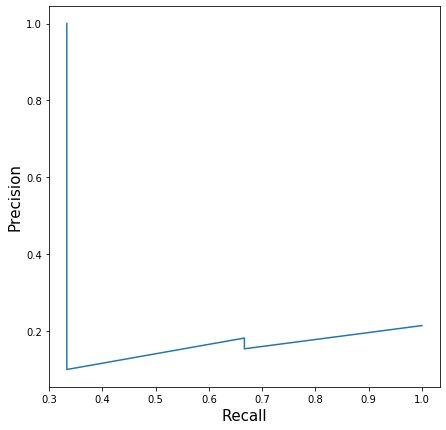

In [8]:
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

In [9]:
#calculate from code 
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
f1(y_true, y_pred)

0.5714285714285715

In [10]:
# calculate f1 with scikit learn
from sklearn import metrics
metrics.f1_score(y_true,y_pred)

0.5714285714285715

In [37]:
#Probing TPR and FPR:
tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)


In [40]:
# create dataframe from lists to pandas
df2 = pd.DataFrame(list(zip(thresholds,tpr_list,fpr_list)), columns =['treshold', 'tpr', 'fpr'])
df2

,treshold,tpr,fpr
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


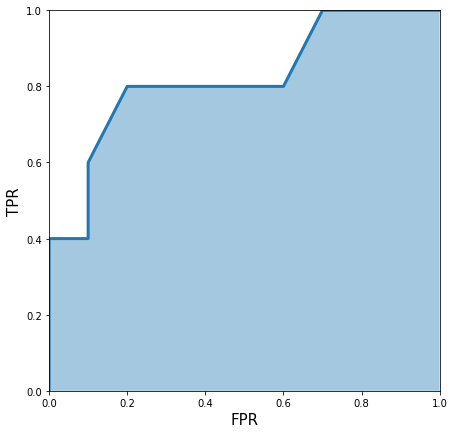

In [28]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()
#Obtain the ROC curve : Receiver operating characterictic
#If we calculate the area behind the curve, we obtain another metric called Area Under ROC Curve or AUC.
#AUC is used very often for dataset with skewed binary targets.

In [29]:
from sklearn import metrics
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
metrics.roc_auc_score(y_true, y_pred)
#AUC = 1 : implies perfect model
#AUC = 0.5 : implies that prediction are random
#AUC <0.5 : probably you have inverted the classes
# AUC = 0.83, a image with nx rank higher than a imagen with no nx with a probability of 0.83

0.8300000000000001

In [30]:
#Calculating TP and FP:
tp_list = []
fp_list = []
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tp
    temp_tp = true_positive(y_true, temp_pred)
    # calculate fp
    temp_fp = false_positive(y_true, temp_pred)
    # append tp and fp to lists
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

In [32]:

df_tp_fp = pd.DataFrame(list(zip(thresholds,tp_list,fp_list)), columns =['treshold', 'tp', 'fp'])
df_tp_fp
#Seeing the table and graphic of ROC we are interested to have high tp and small fp, so treshold = 0.6 seems to be the more convenient
#Most of the time top-left value on ROC curve gives a quite good treshold

,treshold,tp,fp
0,0.00,5,10
1,0.10,5,9
2,0.20,5,7
3,0.30,4,6
4,0.40,4,3
5,0.50,4,3
6,0.60,4,2
7,0.70,3,1
8,0.80,3,1
9,0.85,2,1
